In [1]:
import numpy as np
import pandas as pd
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
from datetime import datetime

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
x = pickle.load(open("HargaSaham.dat", "rb"))   # data harga saham sebanyak 250 observasi.
N = x.shape[0]

pd.DataFrame(x).head()

,0
0,130.883893
1,131.079758
2,131.437295
3,129.094033
4,128.009200


In [3]:
pd.DataFrame(x).describe()

,0
count,250.000000
mean,129.893804
std,4.141466
min,120.302504
25%,126.764918
50%,129.791001
75%,132.864101
max,139.100095


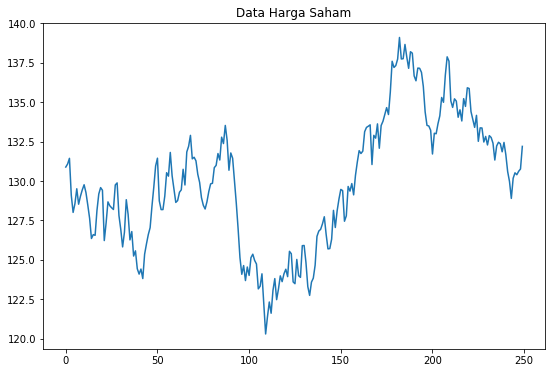

In [4]:
# Plot data
plt.figure(figsize=(9,6))
plt.plot(x)
plt.title("Data Harga Saham")
plt.show()

In [5]:
# Standarisasi
xs = (x-x.min())/(x.max()-x.min())   # Standarisasi data

step = 2   # step atau lag data diwaktu sebelumnya sebagai input
xt = xs[0:N-step,:]
for i in range(step):
    xt = hstack((xt, xs[i+1:N-step+i+1]))   # Dihasilkan matriks dengan (n_step+1) kolom, #n_step kolom pertama
                                            #menjadi variabel X dan kolom terkhir menjadi variabel y

# membagi data input-output
X = xt[:, 0:step]       #Tiga kolom pertama dijadikan sebagai varibel X
y = xt[:, step:step+1]  #Kolom terakhir dijadikan sebagai variabel y

X.shape        

(248, 2)

In [6]:
# Menjadikan dataframe
dfx = pd.DataFrame(X, columns=['t-1','t'])
dfy = pd.DataFrame(y, columns=['t+1'])
df = pd. concat([dfx,dfy], axis=1, sort=True)
df.head()

,t-1,t,t+1
0,0.562912,0.573332,0.592352
1,0.573332,0.592352,0.467694
2,0.592352,0.467694,0.409983
3,0.467694,0.409983,0.439758
4,0.409983,0.439758,0.489736


In [7]:
# menambahkan rolling mean
df['rm3'] = df['t+1'].rolling(window=3).mean() #pd.DataFrame(xs).rolling(window=3).mean()
df['rm7'] = df['t+1'].rolling(window=7).mean() #pd.DataFrame(xs).rolling(window=9).mean()
#df['rm18'] = pd.DataFrame(xs).rolling(window=18).mean()
#df['rm6'] = pd.DataFrame(xs).rolling(window=6).mean()

df.head(10)

,t-1,t,t+1,rm3,rm7
0,0.562912,0.573332,0.592352,NaN,NaN
1,0.573332,0.592352,0.467694,NaN,NaN
2,0.592352,0.467694,0.409983,0.490010,NaN
3,0.467694,0.409983,0.439758,0.439145,NaN
4,0.409983,0.439758,0.489736,0.446493,NaN
5,0.439758,0.489736,0.437683,0.455726,NaN
6,0.489736,0.437683,0.464447,0.463955,0.471665
7,0.437683,0.464447,0.486067,0.462732,0.456481
8,0.464447,0.486067,0.503275,0.484596,0.461564
9,0.486067,0.503275,0.477026,0.488789,0.471142


In [8]:
# menghilangkan baris yang mengandung NaN dari dataframe
df.dropna(inplace=True)
df.head(10)

,t-1,t,t+1,rm3,rm7
6,0.489736,0.437683,0.464447,0.463955,0.471665
7,0.437683,0.464447,0.486067,0.462732,0.456481
8,0.464447,0.486067,0.503275,0.484596,0.461564
9,0.486067,0.503275,0.477026,0.488789,0.471142
10,0.503275,0.477026,0.434892,0.471731,0.470447
11,0.477026,0.434892,0.390080,0.433999,0.456210
12,0.434892,0.390080,0.322012,0.382328,0.439686
13,0.390080,0.322012,0.335084,0.349059,0.421205
14,0.322012,0.335084,0.332733,0.329943,0.399300
15,0.335084,0.332733,0.416128,0.361315,0.386851


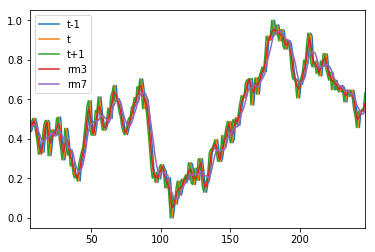

In [9]:
df.plot()
plt.legend(loc='best')

In [10]:
# Membagi data training-testing (xt diganti df)
n_train = round(len(df)*0.90) # jumlah data train 90% dan test 10%

df_x = df.drop(['t+1'], 1)
df_y = df['t+1']

datasetx = np.array(df_x)
datasety = np.array([df_y]).T

X_train = datasetx[:n_train, :]
y_train = datasety[:n_train]
print("x_train = ", X_train.shape)
print("y_train = ", y_train.shape)

X_test = datasetx[n_train:, :]
y_test = datasety[n_train:]
print("x_test = ", X_test.shape)
print("y_test = ", y_test.shape)

x_train =  (218, 4)
y_train =  (218, 1)
x_test =  (24, 4)
y_test =  (24, 1)


In [11]:
class NeuralNetwork:
    
    def __init__(self,x,y,h1,h2): # ada h nodes di dalam hidden layer
        self.X   = x #input
        self.y   = y #output
        
        self.N   = x.shape[0] #jumlah observasi (samples, examples)
        Ni       = x.shape[1] #jumlah features (variables)
        No       = y.shape[1] 
        
        self.W0  = randn(Ni,h1) #nilai awal buat W dari layer 0 (input layer)
        self.b0  = zeros([1,h1]) #nilai awal buat b dari layer 0 (hidden layer)
        
        self.W1  = randn(h1,h2) #nilai awal buat W dari layer 1 (hidden layer)
        self.b1  = zeros([1,h2]) #nilai awal buat b dari layer 1 (hidden layer)

        self.W2  = randn(h2,No) #nilai awal buat W dari layer 2 (output layer)
        self.b2  = zeros([1,No]) #nilai awal buat b dari layer 2 (output layer)
        
    def forward(self):
        Z1       = self.X@self.W0 + self.b0
        #self.A1  = 1/(1 + exp(-Z1))
        self.A1 = (2/(1+exp(-2*Z1))) - 1 #TxH - Tanh
        
        Z2       = self.A1@self.W1 + self.b1
        #self.A2  = 1/(1 + exp(-Z2))
        self.A2 = (2/(1+exp(-2*Z2))) - 1 #TxH - Tanh
        
        Z3       = self.A2@self.W2 + self.b2
        self.A3  = 1/(1 + exp(-Z3))
        
        return self.A3
        
    def backward(self):
        alpha    = 0.01
        e        = self.y - self.A3
        
        delta3   = -e*self.A3*(1 - self.A3) #dC/dZ3
        #delta2   = delta3@self.W2.T*self.A2*(1 - self.A2) #dC/dZ2 - sigmoid
        delta2   = delta3@self.W2.T*(1-self.A2**2) # delta_w1 - Tanh
        #delta1   = delta2@self.W1.T*self.A1*(1 - self.A1) #dC/dZ1 - sigmoid
        delta1   = delta2@self.W1.T*(1-self.A1**2) # delta_w0 - Tanh
    
        self.W2 -= alpha*self.A2.T@delta3
        self.b2 -= alpha*sum(ones([self.N,1]).T@delta3)
        
        self.W1 -= alpha*self.A1.T@delta2
        self.b1 -= alpha*ones([self.N,1]).T@delta2
        
        self.W0 -= alpha*self.X.T@delta1
        self.b0 -= alpha*ones([self.N,1]).T@delta1

    def train(self):
        self.forward()  #forward propagation
        self.backward() #backward propagation

    def predict(self, xs):
        self.X   = xs
        #self.X  = xs/self.maxx
        #self.X  = (xs - self.meanx)/self.stdx
        
        self.forward()
        return self.A3        

In [12]:
H1  = 10  #ada H1 nodes (neurons) di dalam hidden layer pertama
H2  = 10  #ada H2 nodes (neurons) di dalam hidden layer pertama

epochs = 25001 #lakukan latihan sebanyak epochs kali
seed(2020) #seed untuk bilangan acak

ann = NeuralNetwork(X_train,y_train,H1,H2)

tic = datetime.now()
for i in range(epochs): 
    
    if i % 2500 == 0: 
        print ("Iteration #:",i,', ',end = "")
        #print ("Predicted Output: \n", str(ann.forward()))
        
        ycap = ann.forward()
        cost = (y_train-ycap).T@(y_train-ycap)/N #Mean Squared Error (MSE) atau cost function
        
        print ("Akurasi prediksi diukur dengan MSE: %9.7f" %cost[0][0]) # 
        #print ("\n")

    ann.train()

toc = datetime.now()
print('\nDurasinya:',toc-tic)

Iteration #: 0 , Akurasi prediksi diukur dengan MSE: 0.1488923
Iteration #: 2500 , Akurasi prediksi diukur dengan MSE: 0.0010739
Iteration #: 5000 , Akurasi prediksi diukur dengan MSE: 0.0007314
Iteration #: 7500 , Akurasi prediksi diukur dengan MSE: 0.0005347
Iteration #: 10000 , Akurasi prediksi diukur dengan MSE: 0.0004040
Iteration #: 12500 , Akurasi prediksi diukur dengan MSE: 0.0003130
Iteration #: 15000 , Akurasi prediksi diukur dengan MSE: 0.0002472
Iteration #: 17500 , Akurasi prediksi diukur dengan MSE: 0.0001985
Iteration #: 20000 , Akurasi prediksi diukur dengan MSE: 0.0001618
Iteration #: 22500 , Akurasi prediksi diukur dengan MSE: 0.0001339
Iteration #: 25000 , Akurasi prediksi diukur dengan MSE: 0.0001125

Durasinya: 0:00:12.706727


In [13]:
# Prediksi
N = y_test.shape[0]
ycap2 = ann.predict(X_test) # data test
cost_test = (y_test-ycap2).T@(y_test-ycap2)/N #Mean Squared Error (MSE) atau cost function
print ("Akurasi prediksi data test diukur dengan MSE: %9.7f" %cost_test[0][0]) # 

Akurasi prediksi data test diukur dengan MSE: 0.0000832


In [14]:
#revert
ytrain_pred = (ycap * (x.max()-x.min())) + x.min()
ytrain_act = (y_train * (x.max()-x.min())) + x.min()

ytest_pred = (ycap2 * (x.max()-x.min())) + x.min()
ytest_act = (y_test * (x.max()-x.min())) + x.min()

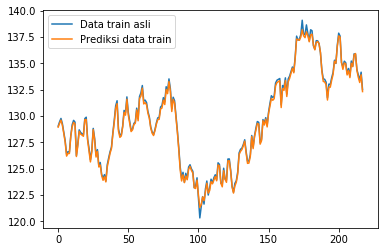

In [15]:
plt.plot(ytrain_act, label='Data train asli')
plt.plot(ytrain_pred, label='Prediksi data train')
plt.legend()
plt.show()

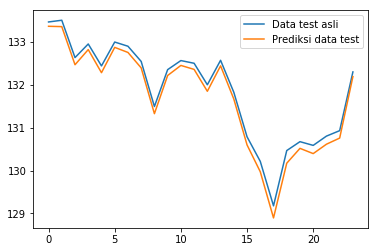

In [16]:
plt.plot(ytest_pred, label='Data test asli')
plt.plot(ytest_act, label='Prediksi data test')
plt.legend()
plt.show()

In [17]:
y_train.shape

(218, 1)